<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Actividad_5/Actividad_5_PobleteJuan_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [1]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 308 (delta 42), reused 59 (delta 14), pack-reused 219
Receiving objects: 100% (308/308), 10.78 MiB | 24.31 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
from scipy.io import wavfile

tasa_muestras, datos = wavfile.read('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

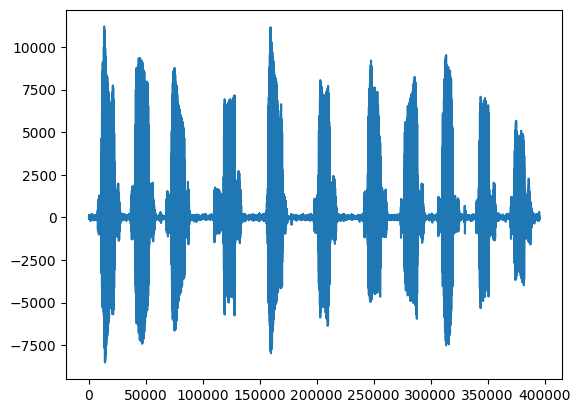

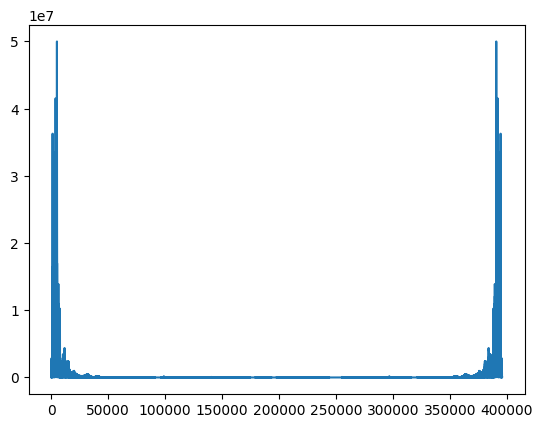

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


wav_fft = np.fft.fft(datos)
a= np.fft.fftfreq(len(datos))


plt.plot(datos)

plt.figure()
plt.plot(np.abs(wav_fft))

Audio(datos,rate=tasa_muestras)

## 2. Obtén el espectrograma de tu señal de audio

In [ ]:
!pip install librosa

197893


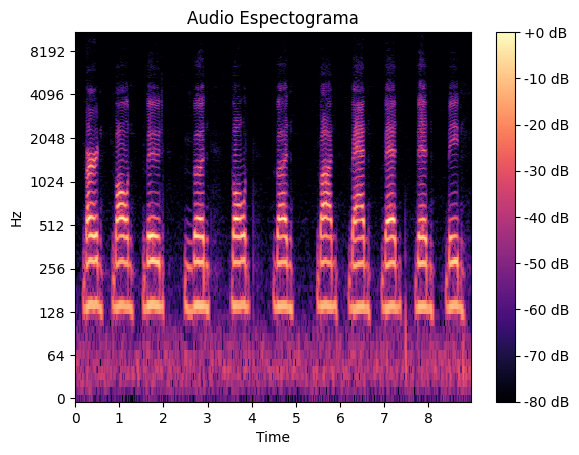

In [5]:
import librosa
datos1,sr = librosa.load('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

x=librosa.stft(datos1)
xdb=librosa.amplitude_to_db(np.abs(x),ref=np.max)

plt.figure()
img=librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='log')
plt.colorbar(img, format="%+2.0f dB")
plt.title('Audio Espectograma')

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

![image.png](attachment:image.png)

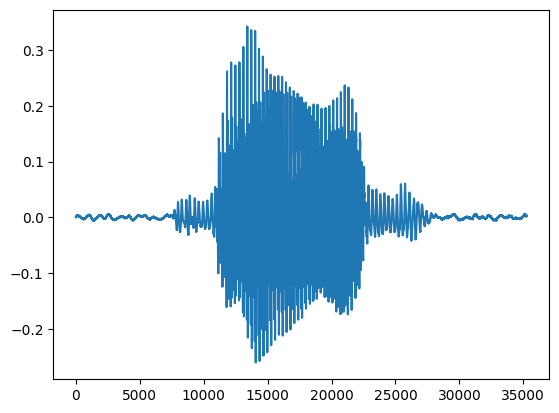

In [ ]:
def fragment_audio(datos_audio, num_segmentos, sr, segment_length_sec, overlap):

    # Calcula longitud de cada segmento
    largo_segmentos = int(sr * datos_audio)
    overlap_lado = overlap // 2 #overlap por lado

    # Calcula el total de slices - 1
    total_slices = num_segmentos - 1  # se deja 1 de distinta longuitud

    # separa la señal de audio
    slices = []
    for i in range(total_slices):
        start_idx = i * (largo_segmentos - overlap_lado)
        end_idx = start_idx + largo_segmentos
        slices.append(y[start_idx:end_idx]) # guarda segmentos en array

    # agrega ultimo fragmento
    start_idx = total_slices * (largo_segmentos - overlap_lado)
    end_idx = len(y)
    slices.append(y[start_idx:end_idx])

    return slices

datos1,sr = librosa.load('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')
segmentos = 10
duracion = 0.8
overlap= 500
slices = fragment_audio(datos1, sr, segmentos, duracion, overlap)

plt.plot(slices[0])

Audio(slices[0],rate=tasa_muestras)

## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


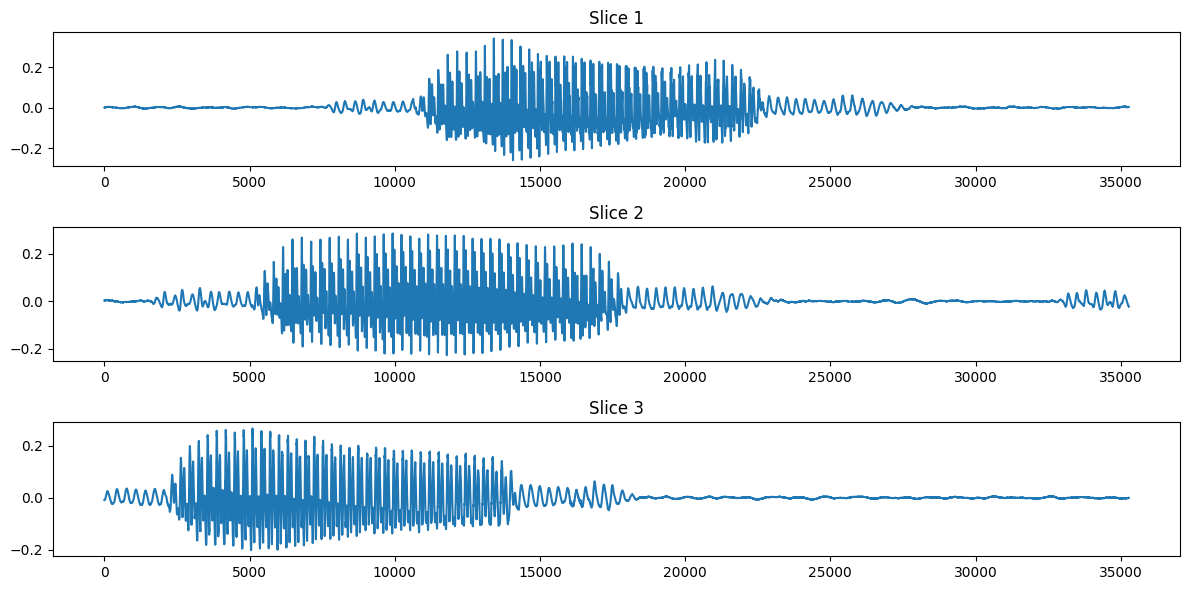

In [21]:
import librosa
import torch
import matplotlib.pyplot as plt

def fragment_audio(audio_file, num_segments, segment_length_sec, overlap):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_file, sr=None)
    segment_length_samples = int(sr * segment_length_sec)
    overlap_half = overlap // 2

    total_slices = num_segments - 1

    slices = []
    for i in range(total_slices):
        start_idx = i * (segment_length_samples - overlap_half)
        end_idx = start_idx + segment_length_samples
        slices.append(torch.tensor(y[start_idx:end_idx]))

    start_idx = total_slices * (segment_length_samples - overlap_half)
    end_idx = len(y)

    slices.append(torch.tensor(y[start_idx:end_idx]))

    return slices, sr

audio_file = '/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav'
num_segments = 10
segment_length_sec = 0.8
overlap_samples = 500

slices, sr = fragment_audio(audio_file, num_segments, segment_length_sec, overlap_samples)

# Graficar un par de slices
plt.figure(figsize=(12, 6))
for i in range(3):

    plt.subplot(3, 1, i + 1)
    plt.plot(slices[i].numpy())
    plt.title(f"Slice {i+1}")


plt.tight_layout()
plt.show()


Audio(slices[0].numpy(), rate=sr)


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

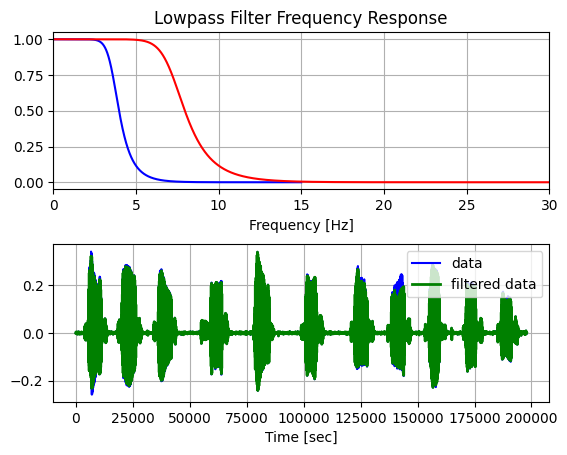

In [18]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

order = 6
fs = 30.0
cutoff = 3.667

b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), "b")
plt.xlim(0, 0.5 * fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel("Frequency [Hz]")
plt.grid()

order = 2
fs = 60
cutoff = 3.667

w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), "r")
plt.xlim(0, 0.5 * fs)

T = 5.0
n = int(T * fs)
t = np.linspace(0, T, n, endpoint=False)

y = butter_lowpass_filter(datos1, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot( datos1, "b-", label="data")
plt.plot(y, "g-", linewidth=2, label="filtered data")
plt.xlabel("Time [sec]")
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
